In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
users = pd.read_json('./data/ultimate_data_challenge.json')

In [174]:
users.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


## Data Description

- city: city this user signed up in <br> 
<br>
 
- phone: primary device for this user <br> 
<br>
 
- signup_date: date of account registration; in the form ‘YYYYMMDD’ <br> 
<br>
 
- last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’ <br> 
<br>
 
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup <br> 
<br>
 
- avg_rating_by_driver: the rider’s average rating over all of their trips <br> 
<br>
 
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips <br> 
<br>
 
- surge_pct: the percent of trips taken with surge multiplier > 1 <br> 
<br>
 
- avg_surge: The average surge multiplier over all of this user’s trips <br> 
<br>
 
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up <br> 
<br>
 
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise <br> 
<br>
 
- weekday_pct: the percent of the user’s trips occurring during a weekday <br> 
<br>
 

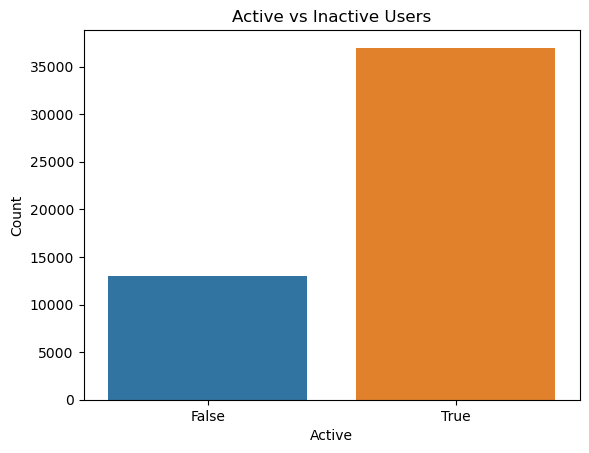

In [175]:
# Add 'active' column to users dataframe
users['active'] = (pd.to_datetime(users['last_trip_date']) - pd.to_datetime(users['signup_date'])).dt.days > 30

# Plot active vs inactive users
sns.countplot(x='active', data=users)
plt.title('Active vs Inactive Users')
plt.xlabel('Active')
plt.ylabel('Count')
plt.show()


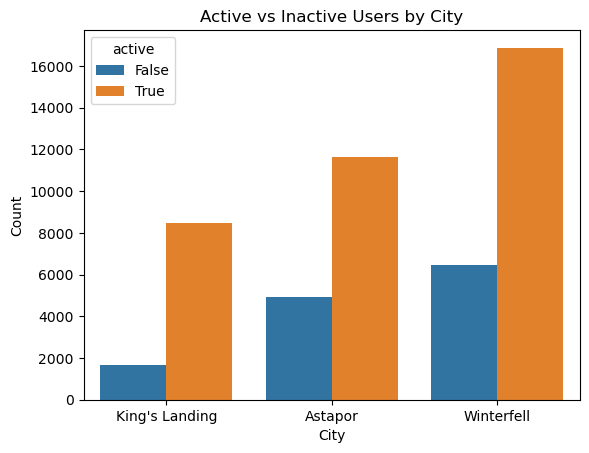

In [176]:
# Plot the active vs inactive users by city
sns.countplot(x='city', data=users, hue='active')
plt.title('Active vs Inactive Users by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

In [177]:
# Print the percentage of active users by city
print(users.groupby('city')['active'].mean())

city
Astapor           0.703399
King's Landing    0.835735
Winterfell        0.723217
Name: active, dtype: float64


<h3>
Astapor and Winterfell both are just around 70% for active users. King's Landing is at ~83%. There are only 3 cities in the dataset and King's Landing has the lowest count of users, so it is possible that city is insignificant when predicting active users and will be dropped.
</h3>

In [178]:
# Dropping the city column
users = users.drop('city', axis=1)

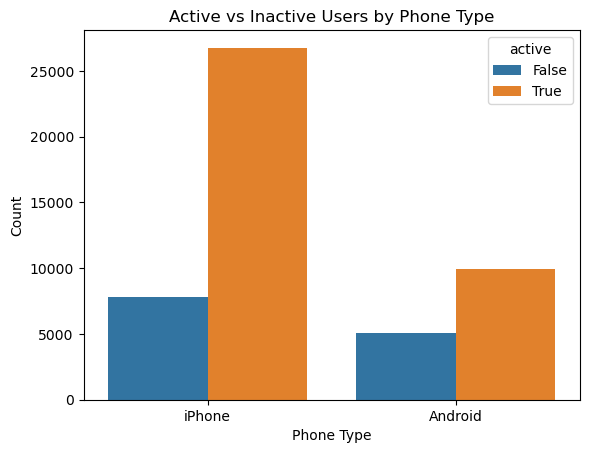

In [179]:
# Plot the active vs inactive users by phone
sns.countplot(x='phone', data=users, hue='active')
plt.title('Active vs Inactive Users by Phone Type')
plt.xlabel('Phone Type')
plt.ylabel('Count')
plt.show()

In [181]:
# Print the percentage of active users by city
print(users.groupby('phone')['active'].mean())

phone
Android    0.663560
iPhone     0.774131
Name: active, dtype: float64


<h3>
The graph would make it seem that the phone type is significant in predicting active users, but Android is at 66% and iPhone is at 77%. This is just a 11% difference and is possible that phone type is insignificant when predicting active users, and so will be dropped. 
</h3>

In [182]:
# Dropping the phone column
users = users.drop('phone', axis=1)

In [183]:
recent_date = users['last_trip_date'].max()
print(recent_date)

# Add days since last trip column
users['days_since_last_trip'] = pd.to_datetime(recent_date) - pd.to_datetime(users['last_trip_date'])
users['days_since_last_trip'] = users['days_since_last_trip'].dt.days

2014-07-01


In [184]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   signup_date             50000 non-null  object 
 2   avg_rating_of_driver    41878 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   last_trip_date          50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  bool   
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    49799 non-null  float64
 10  active                  50000 non-null  bool   
 11  days_since_last_trip    50000 non-null  int64  
dtypes: bool(2), float64(6), int64(2), object(2)
memory usage: 3.9+ MB


In [185]:
users.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,72.665220
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,61.718985
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,13.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,54.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,137.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,181.000000


In [186]:
# Pull users with avg_rating_of_driver or avg_rating_by_driver missing
nan_rating = users[(users['avg_rating_of_driver'].isnull()) | (users['avg_rating_by_driver'].isnull())]
nan_rating.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip
count,8256.000000,134.000000,8256.000000,8256.000000,8256.000000,8256.000000,8055.000000,8256.000000
mean,0.593508,4.526119,1.080160,8.671766,59.013057,7.473033,4.785984,98.859738
std,0.605428,0.930513,0.315857,26.788230,46.905514,7.734478,0.622122,59.422875
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.000000,1.000000,0.000000,0.000000,2.400000,5.000000,41.000000
50%,1.000000,5.000000,1.000000,0.000000,100.000000,4.685000,5.000000,107.000000
75%,1.000000,5.000000,1.000000,0.000000,100.000000,10.630000,5.000000,156.000000
max,5.000000,5.000000,5.000000,100.000000,100.000000,160.960000,5.000000,181.000000


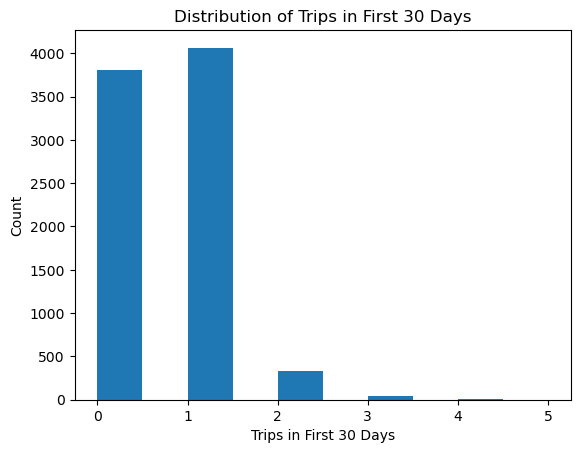

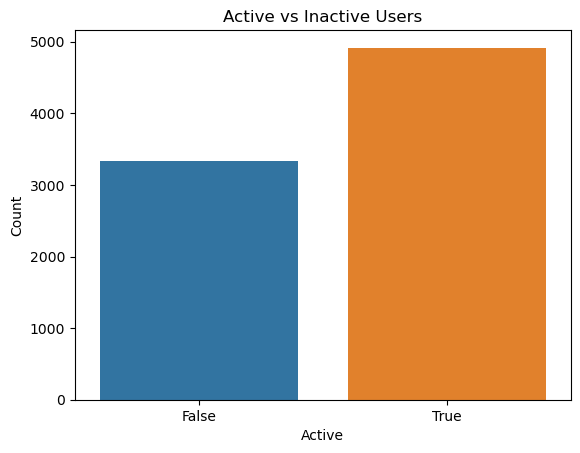

In [187]:
# Plot the distribution of the number of trips in the first 30 days
plt.hist(nan_rating['trips_in_first_30_days'])
plt.xlabel('Trips in First 30 Days')
plt.ylabel('Count')
plt.title('Distribution of Trips in First 30 Days')

plt.show()

# Plot active vs inactive users
sns.countplot(x='active', data=nan_rating)
plt.title('Active vs Inactive Users')
plt.xlabel('Active')
plt.ylabel('Count')

plt.show()


<h3>
When pulling users that either have not rated their driver or have not been rated by their driver, all have taken less than 5 trips and the majority took either 0 or 1 trip within the first 30 days. <br>
What is interesting is that a significant amount of users without ratings are considered active users. <br>
<br>
Another note is that the lowest rating present is 1.0. The nan values will be set to 0 to represent no rating.<br>
</h3>

In [188]:
# Setting the missing values to 0
users['avg_rating_of_driver'] = users['avg_rating_of_driver'].fillna(0)
users['avg_rating_by_driver'] = users['avg_rating_by_driver'].fillna(0)

In [189]:
# Scaling the data before plotting correlations
# Scale the data (0-1)
def scale_dateframe(df):
    scaled_df = pd.DataFrame()
    for column in df.columns:
        if df[column].dtype in [np.float64, np.int64]:
            scaled_df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    return scaled_df

scaled_users = scale_dateframe(users)
scaled_users['ultimate_black_user'] = users['ultimate_black_user'].astype(int)
scaled_users['active'] = users['active'].astype(int)

scaled_users.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,ultimate_black_user,active
0,0.032,0.94,0.014286,0.154,0.462,0.022801,1.00,0.077348,1,1
1,0.000,1.00,0.000000,0.000,0.500,0.051317,1.00,0.314917,0,1
2,0.024,0.86,0.000000,0.000,1.000,0.004784,1.00,0.966851,0,0
3,0.072,0.92,0.020000,0.200,0.800,0.014662,0.98,0.011050,1,1
4,0.112,0.88,0.027143,0.118,0.824,0.019446,0.98,0.596685,0,1


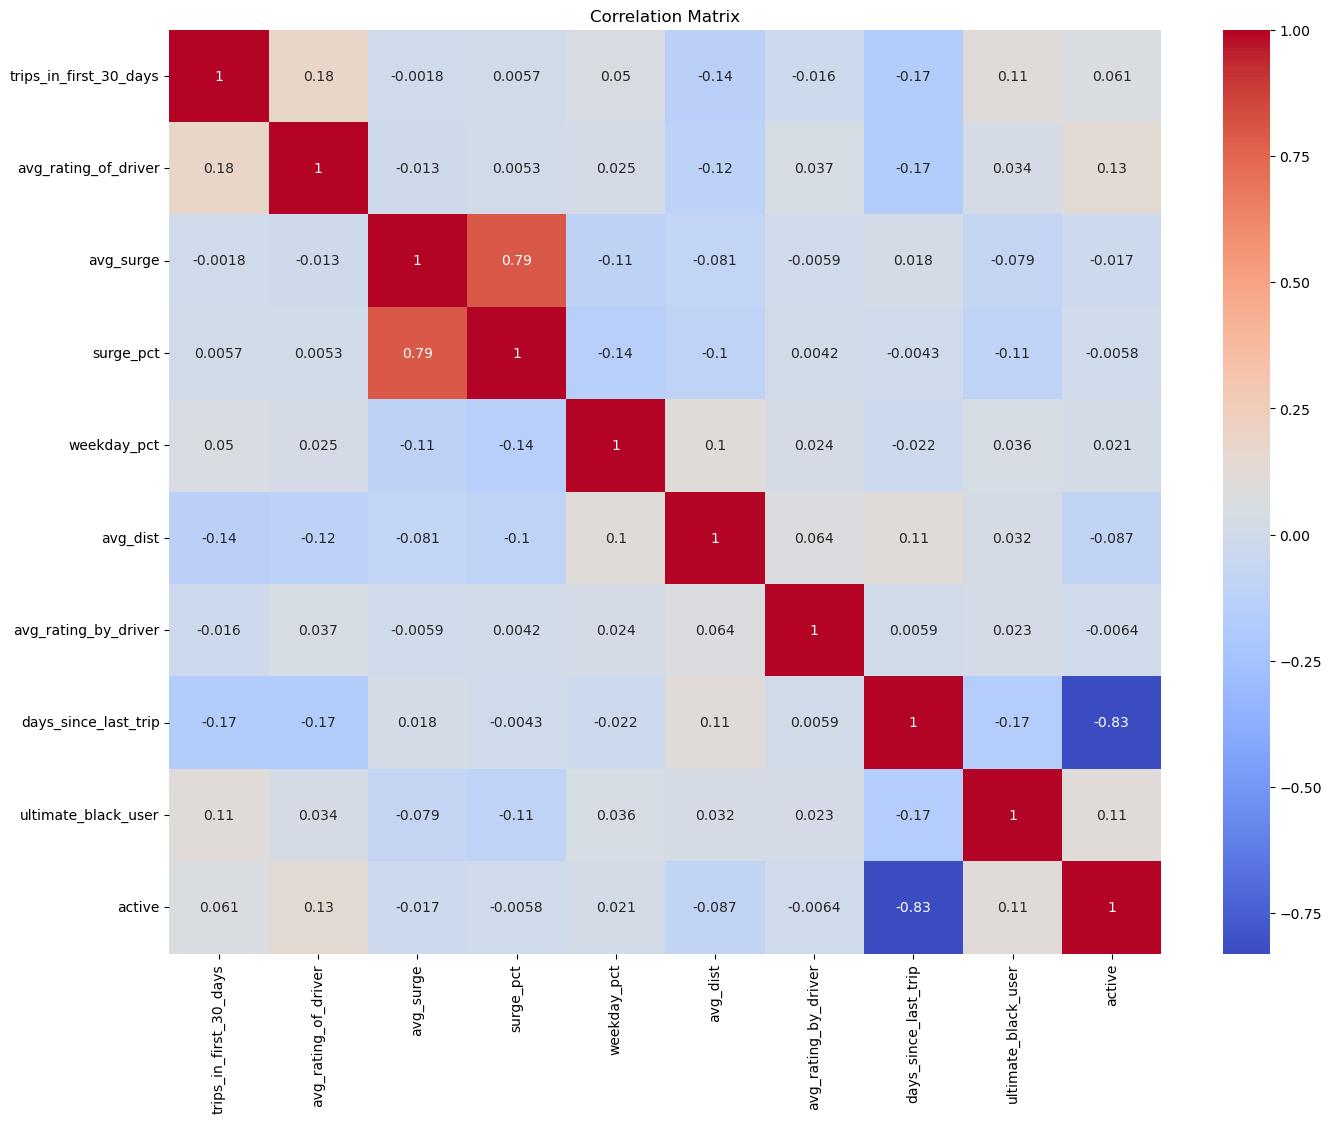

In [190]:
# Correlation matrix
fig = plt.figure(figsize=(16, 12))
sns.heatmap(scaled_users.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

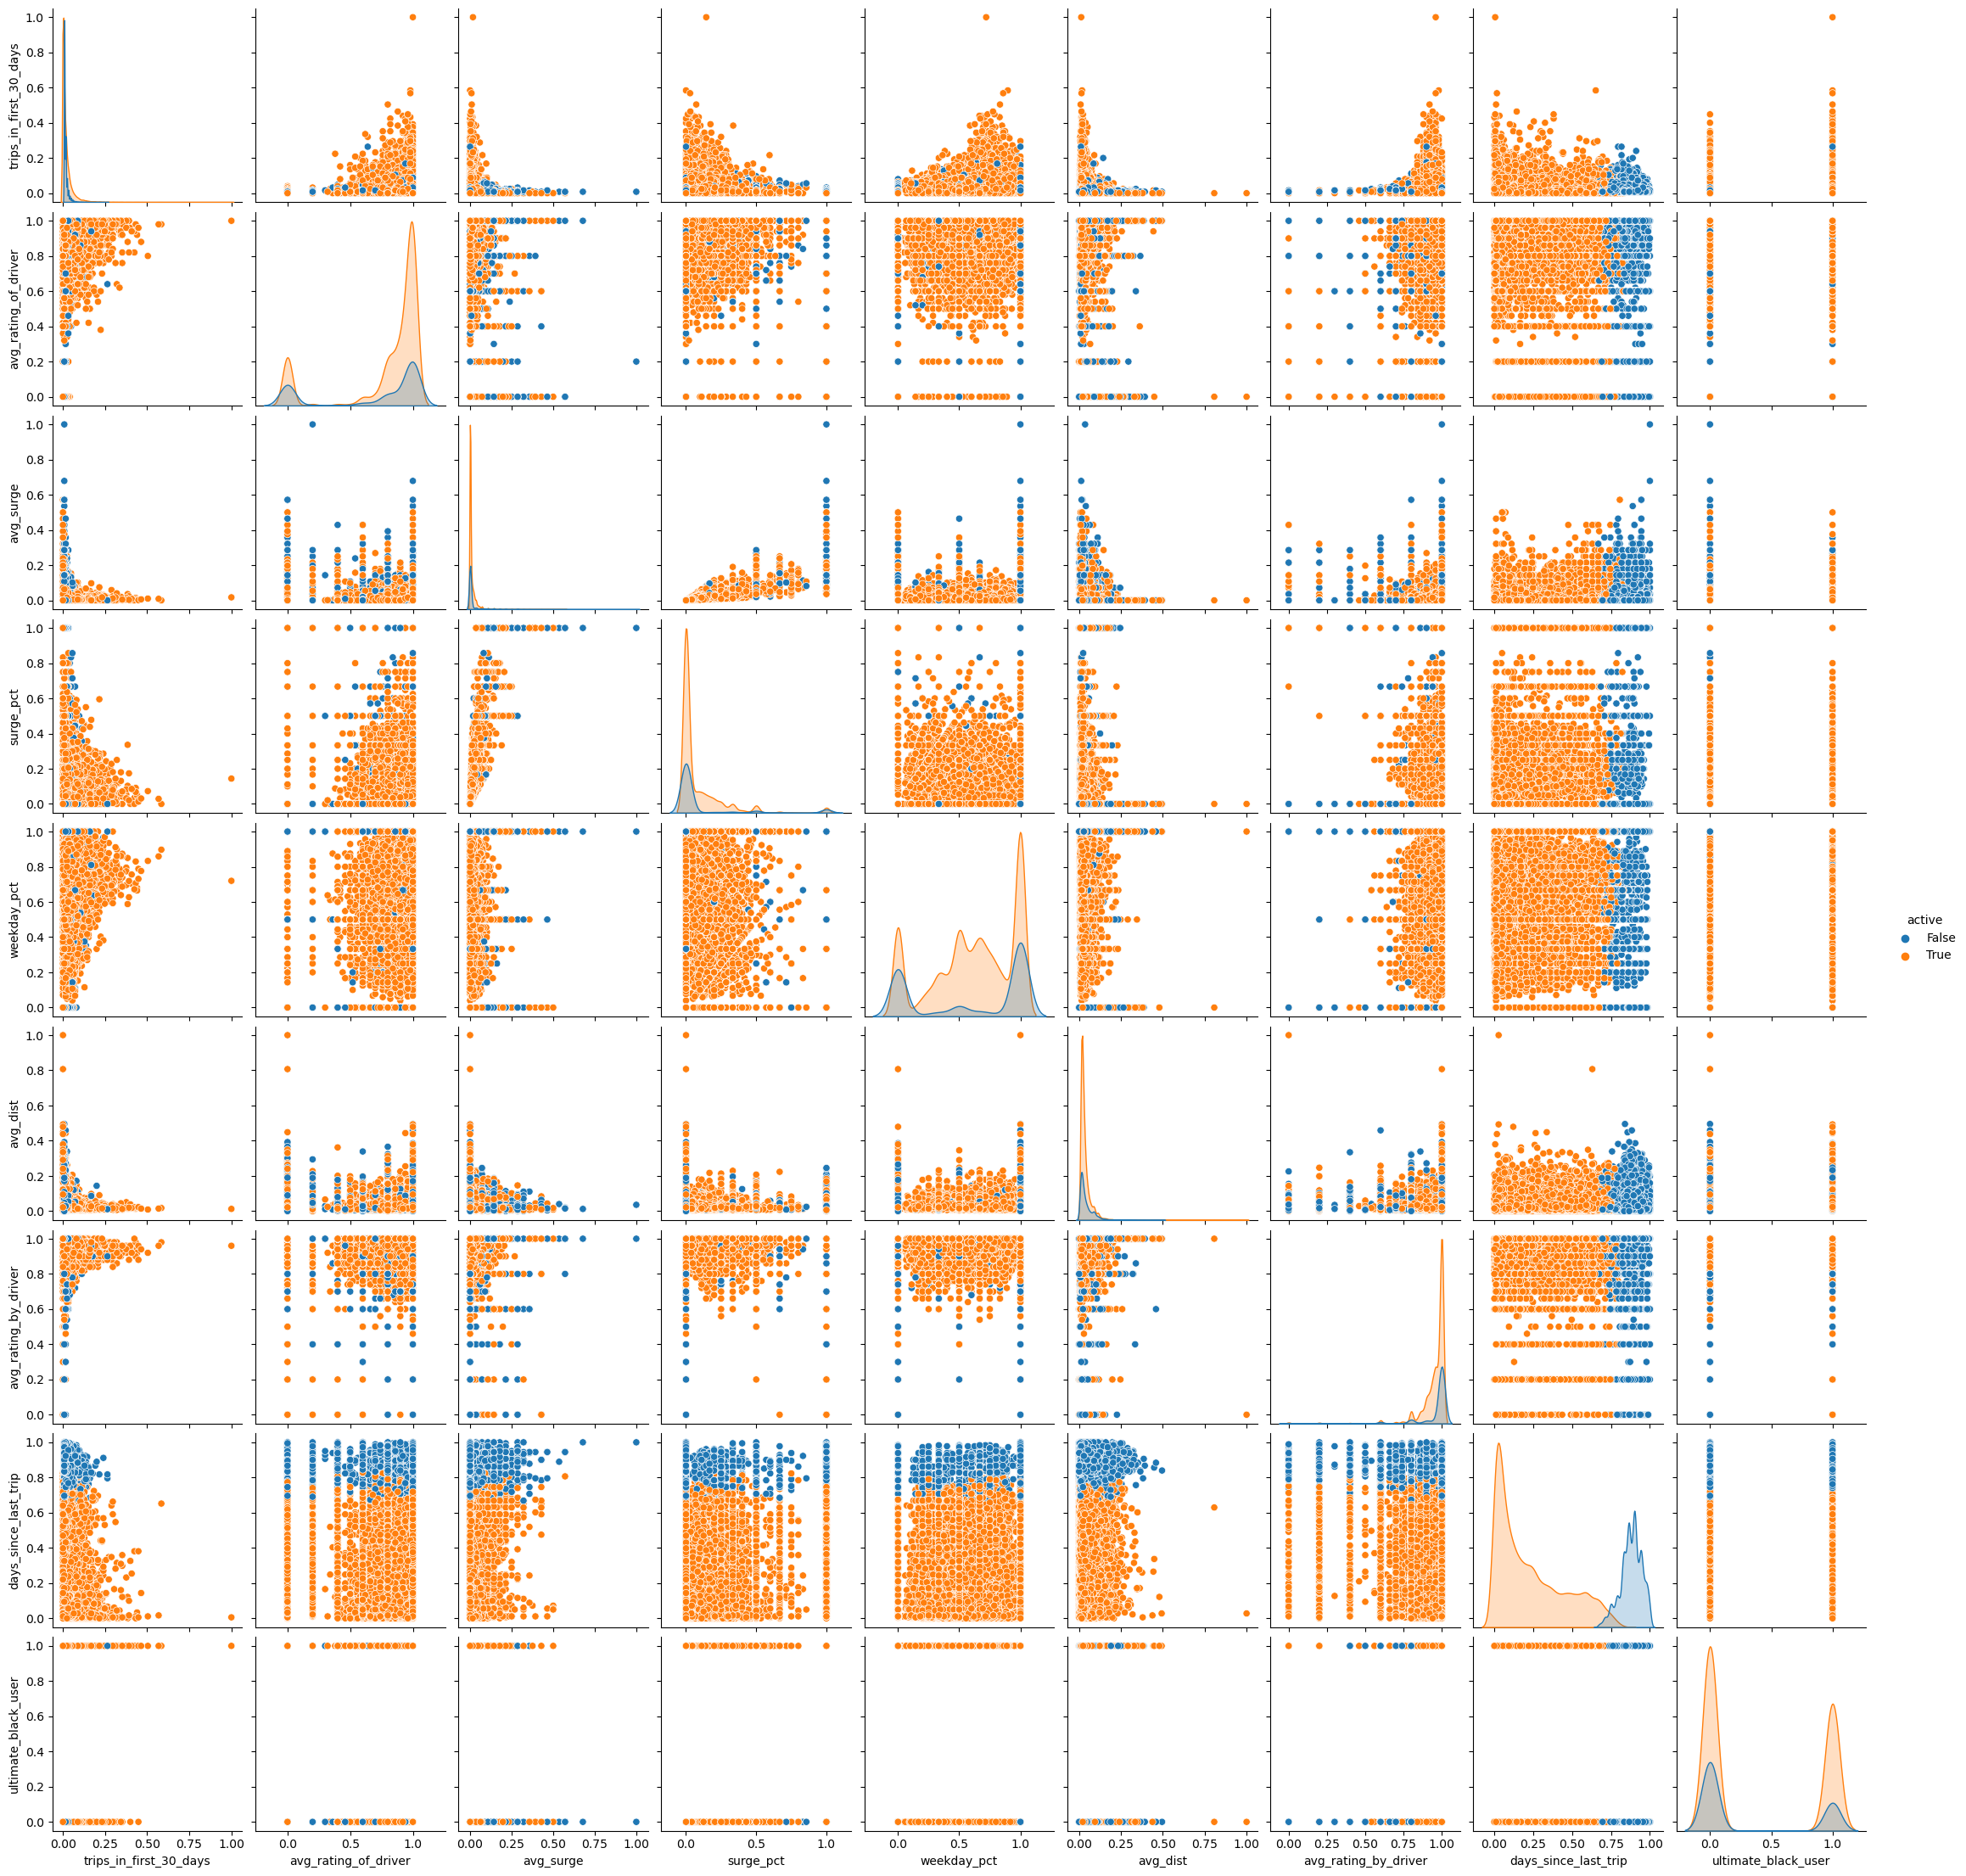

In [191]:
# Add 'active' column to scaled_users dataframe
scaled_users['active'] = users['active']

# Pairplot
cols = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'days_since_last_trip', 'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user', 'weekday_pct']
sns.pairplot(scaled_users, hue='active')

# Model Training

In [192]:
# Splitting the data into features and target
X = users.drop(['active', 'signup_date', 'last_trip_date', 'days_since_last_trip'], axis=1)
y = users['active']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [193]:
model_accuracies = {}

## Gradient Boosting

In [194]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

# Model Accuracy
from sklearn.metrics import accuracy_score
model_accuracies['Gradient Boosting'] = round((accuracy_score(y_test, gb_pred) * 100), 2)
print(f'Gradient Boosting Accuracy: {model_accuracies["Gradient Boosting"]}')

[[ 3331   532]
 [  791 10346]]
              precision    recall  f1-score   support

       False       0.81      0.86      0.83      3863
        True       0.95      0.93      0.94     11137

    accuracy                           0.91     15000
   macro avg       0.88      0.90      0.89     15000
weighted avg       0.91      0.91      0.91     15000

Gradient Boosting Accuracy: 91.18


In [195]:
# Feature Importance
feature_importance = pd.DataFrame(gb_model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance

,Importance
weekday_pct,0.358305
trips_in_first_30_days,0.315202
avg_rating_by_driver,0.245260
surge_pct,0.055165
avg_rating_of_driver,0.010345
avg_dist,0.008630
ultimate_black_user,0.005944
avg_surge,0.001149


## k-Nearest Neighbors

In [196]:
# K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Model Evaluation
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

# Model Accuracy
model_accuracies['K-Nearest Neighbors'] = round((accuracy_score(y_test, knn_pred) * 100), 2)
print(f'K-Nearest Neighbors Accuracy: {model_accuracies["K-Nearest Neighbors"]}')

[[ 2939   924]
 [  973 10164]]
              precision    recall  f1-score   support

       False       0.75      0.76      0.76      3863
        True       0.92      0.91      0.91     11137

    accuracy                           0.87     15000
   macro avg       0.83      0.84      0.84     15000
weighted avg       0.87      0.87      0.87     15000

K-Nearest Neighbors Accuracy: 87.35


## K-Nearst Neighbors with GridSearchCV

In [197]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

knn_modelGSCV = KNeighborsClassifier(n_neighbors= knn_gscv.best_params_['n_neighbors'])
knn_modelGSCV.fit(X_train, y_train)
knn_predGSCV = knn_modelGSCV.predict(X_test)

# Model Evaluation
print(confusion_matrix(y_test, knn_predGSCV))
print(classification_report(y_test, knn_predGSCV))

# Model Accuracy
model_accuracies['K-Nearest Neighbors GSCV'] = round((accuracy_score(y_test, knn_predGSCV) * 100), 2)
print(f'K-Nearest Neighbors GSCV Accuracy: {model_accuracies["K-Nearest Neighbors GSCV"]}')

[[ 3072   791]
 [  949 10188]]
              precision    recall  f1-score   support

       False       0.76      0.80      0.78      3863
        True       0.93      0.91      0.92     11137

    accuracy                           0.88     15000
   macro avg       0.85      0.86      0.85     15000
weighted avg       0.89      0.88      0.88     15000

K-Nearest Neighbors GSCV Accuracy: 88.4


## Keras Neural Network

In [198]:
from keras import layers
from keras.models import Sequential
from keras.optimizers import Adam

# Neural Network
model = Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test), verbose=0)

# Model Evaluation
nn_pred = model.predict(X_test)
nn_pred = (nn_pred > 0.5)
print(confusion_matrix(y_test, nn_pred))
print(classification_report(y_test, nn_pred))

# Model Accuracy
model_accuracies['Neural Network'] = round((accuracy_score(y_test, nn_pred) * 100), 2)
print(f'Neural Network Accuracy: {model_accuracies["Neural Network"]}')

c:\Users\eliwi\anaconda3\Lib\site-packages\keras\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step
[[ 2991   872]
 [  740 10397]]
              precision    recall  f1-score   support

       False       0.80      0.77      0.79      3863
        True       0.92      0.93      0.93     11137

    accuracy                           0.89     15000
   macro avg       0.86      0.85      0.86     15000
weighted avg       0.89      0.89      0.89     15000

Neural Network Accuracy: 89.25


## Logistic Regression

In [199]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# Model Evaluation
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))

# Model Accuracy
model_accuracies['Logistic Regression'] = round((accuracy_score(y_test, log_pred) * 100), 2)
print(f'Logistic Regression Accuracy: {model_accuracies["Logistic Regression"]}')

[[   66  3797]
 [   74 11063]]
              precision    recall  f1-score   support

       False       0.47      0.02      0.03      3863
        True       0.74      0.99      0.85     11137

    accuracy                           0.74     15000
   macro avg       0.61      0.51      0.44     15000
weighted avg       0.67      0.74      0.64     15000

Logistic Regression Accuracy: 74.19


## Perceptron

In [200]:
from sklearn.linear_model import Perceptron
perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)
perceptron_pred = perceptron_model.predict(X_test)

# Model Evaluation
print(confusion_matrix(y_test, perceptron_pred))
print(classification_report(y_test, perceptron_pred))

# Model Accuracy
model_accuracies['Perceptron'] = round((accuracy_score(y_test, perceptron_pred) * 100), 2)
print(f'Perceptron Accuracy: {model_accuracies["Perceptron"]}')

[[1053 2810]
 [2606 8531]]
              precision    recall  f1-score   support

       False       0.29      0.27      0.28      3863
        True       0.75      0.77      0.76     11137

    accuracy                           0.64     15000
   macro avg       0.52      0.52      0.52     15000
weighted avg       0.63      0.64      0.64     15000

Perceptron Accuracy: 63.89


## Random Forest

In [201]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Model Evaluation
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

# Model Accuracy
model_accuracies['Random Forest'] = round((accuracy_score(y_test, rf_pred) * 100), 2)
print(f'Random Forest Accuracy: {model_accuracies["Random Forest"]}')

[[ 3131   732]
 [  670 10467]]
              precision    recall  f1-score   support

       False       0.82      0.81      0.82      3863
        True       0.93      0.94      0.94     11137

    accuracy                           0.91     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.91      0.91      0.91     15000

Random Forest Accuracy: 90.65


In [202]:
# Feature Importance
feature_importance = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance

,Importance
trips_in_first_30_days,0.354437
avg_dist,0.214668
weekday_pct,0.167179
avg_rating_by_driver,0.101281
avg_rating_of_driver,0.058144
surge_pct,0.052417
avg_surge,0.041519
ultimate_black_user,0.010356


## Random Forest with GridSearchCV

In [203]:
rf_modelGSCV = RandomForestClassifier()
param_grid = {'n_estimators': np.arange(10, 250, 10)}
rf_gscv = GridSearchCV(rf_modelGSCV, param_grid, cv=5)
rf_gscv.fit(X_train, y_train)

rf_modelGSCV = RandomForestClassifier(n_estimators= rf_gscv.best_params_['n_estimators'])
rf_modelGSCV.fit(X_train, y_train)
rf_predGSCV = rf_modelGSCV.predict(X_test)

# Model Evaluation
print(confusion_matrix(y_test, rf_predGSCV))
print(classification_report(y_test, rf_predGSCV))

# Model Accuracy
model_accuracies['Random Forest GSCV'] = round((accuracy_score(y_test, rf_predGSCV) * 100), 2)
print(f'Random Forest GSCV Accuracy: {model_accuracies["Random Forest GSCV"]}')

[[ 3119   744]
 [  657 10480]]
              precision    recall  f1-score   support

       False       0.83      0.81      0.82      3863
        True       0.93      0.94      0.94     11137

    accuracy                           0.91     15000
   macro avg       0.88      0.87      0.88     15000
weighted avg       0.91      0.91      0.91     15000

Random Forest GSCV Accuracy: 90.66


## Random Forest Regressor

In [204]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)
rf_reg_pred = rf_reg.predict(X_test)

# Model Evaluation
rf_reg_pred = rf_reg_pred > 0.5
print(confusion_matrix(y_test, rf_reg_pred))
print(classification_report(y_test, rf_reg_pred))

# Model Accuracy
model_accuracies['Random Forest Regressor'] = round((accuracy_score(y_test, rf_reg_pred) * 100), 2)
print(f'Random Forest Regressor Accuracy: {model_accuracies["Random Forest Regressor"]}')

[[ 3280   583]
 [  717 10420]]
              precision    recall  f1-score   support

       False       0.82      0.85      0.83      3863
        True       0.95      0.94      0.94     11137

    accuracy                           0.91     15000
   macro avg       0.88      0.89      0.89     15000
weighted avg       0.91      0.91      0.91     15000

Random Forest Regressor Accuracy: 91.33


## Random Forest Regressor with GridSearchCV

In [205]:
rf_regGSCV = RandomForestRegressor()
param_grid = {'n_estimators': np.arange(1, 25)}
rf_reg_gscv = GridSearchCV(rf_regGSCV, param_grid, cv=5)
rf_reg_gscv.fit(X_train, y_train)

rf_reg_modelGSCV = RandomForestRegressor(n_estimators= rf_reg_gscv.best_params_['n_estimators'])
rf_reg_modelGSCV.fit(X_train, y_train)
rf_reg_predGSCV = rf_reg_modelGSCV.predict(X_test)

# Model Evaluation
rf_reg_predGSCV = rf_reg_predGSCV > 0.5
print(confusion_matrix(y_test, rf_reg_predGSCV))
print(classification_report(y_test, rf_reg_predGSCV))

# Model Accuracy
model_accuracies['Random Forest Regressor GSCV'] = round((accuracy_score(y_test, rf_reg_predGSCV) * 100), 2)
print(f'Random Forest Regressor GSCV Accuracy: {model_accuracies["Random Forest Regressor GSCV"]}')

[[ 3277   586]
 [  754 10383]]
              precision    recall  f1-score   support

       False       0.81      0.85      0.83      3863
        True       0.95      0.93      0.94     11137

    accuracy                           0.91     15000
   macro avg       0.88      0.89      0.88     15000
weighted avg       0.91      0.91      0.91     15000

Random Forest Regressor GSCV Accuracy: 91.07


## Support Vector Machine

In [206]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

# Model Evaluation
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

# Model Accuracy
model_accuracies['Support Vector Classifier'] = round((accuracy_score(y_test, svc_pred) * 100), 2)
print(f'Support Vector Classifier Accuracy: {model_accuracies["Support Vector Classifier"]}')

[[ 3058   805]
 [  986 10151]]
              precision    recall  f1-score   support

       False       0.76      0.79      0.77      3863
        True       0.93      0.91      0.92     11137

    accuracy                           0.88     15000
   macro avg       0.84      0.85      0.85     15000
weighted avg       0.88      0.88      0.88     15000

Support Vector Classifier Accuracy: 88.06


## Support Vector Machine with GridSearchCV

In [207]:
svc_modelGSCV = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

# Best parameters: {'C': 1000, 'gamma': 0.1}, set to these values as train time was excess of 1hr
#svc_gscv = GridSearchCV(svc_modelGSCV, param_grid, cv=5)
#svc_gscv.fit(X_train, y_train)

svc_modelGSCV = SVC(C= 1000, gamma= 0.1)
svc_modelGSCV.fit(X_train, y_train)
svc_predGSCV = svc_modelGSCV.predict(X_test)

# Model Evaluation
print(confusion_matrix(y_test, svc_predGSCV))
print(classification_report(y_test, svc_predGSCV))

# Model Accuracy
model_accuracies['SVC GridSearch'] = round((accuracy_score(y_test, svc_predGSCV) * 100), 2)
print(f'SVC GridSearch Accuracy: {model_accuracies["SVC GridSearch"]}')

[[ 3288   575]
 [  887 10250]]
              precision    recall  f1-score   support

       False       0.79      0.85      0.82      3863
        True       0.95      0.92      0.93     11137

    accuracy                           0.90     15000
   macro avg       0.87      0.89      0.88     15000
weighted avg       0.91      0.90      0.90     15000

SVC GridSearch Accuracy: 90.25


## Model Accuracies

In [208]:
accuracies = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])
accuracies = accuracies.sort_values('Accuracy', ascending=False)
accuracies

,Model,Accuracy
8,Random Forest Regressor,91.33
0,Gradient Boosting,91.18
9,Random Forest Regressor GSCV,91.07
7,Random Forest GSCV,90.66
6,Random Forest,90.65
11,SVC GridSearch,90.25
3,Neural Network,89.25
2,K-Nearest Neighbors GSCV,88.40
10,Support Vector Classifier,88.06
1,K-Nearest Neighbors,87.35


### Will combine the models with >90% to create a voting classifier to see if the combined models can predict active users better than the individual models.<br>

### For each model with grid search used, only the orignal will be used if it scored higher than its grid search model.

In [209]:
models = ['Random Forest Regressor', 'Gradient Boosting', 'Random Forest GSCV', 'SVC GridSearch']

In [212]:
class Classifier():

    def __init__(self, rf_reg, gb_model, rf_modelGSCV, svc_modelGSCV):
        self.RFReg_model = rf_reg
        self.GB_model = gb_model
        self.RF_model = rf_modelGSCV
        self.SVC_model = svc_modelGSCV

    def fit(self, X, y):
        # No training needed for TensorFlow model in this case
        pass

    def predict(self, X):

        GB_predictions = self.GB_model.predict(X)
        GB_predictions = GB_predictions.reshape(-1, 1)

        RFReg_predictions = self.RFReg_model.predict(X)
        RFReg_predictions = RFReg_predictions.reshape(-1, 1)
        RFReg_predictions = RFReg_predictions > 0.5

        RF_predictions = self.RF_model.predict(X)
        RF_predictions = RF_predictions.reshape(-1, 1)

        SVC_predictions = self.SVC_model.predict(X)
        SVC_predictions = SVC_predictions.reshape(-1, 1)

        predictions = np.mean([GB_predictions, RFReg_predictions, RF_predictions, SVC_predictions], axis=0)

        # Return the mean of the predictions
        return predictions
    
    def score(self, X, y):
        # Get the mean of the predictions
        mean_predictions = self.predict(X)
        # Return the accuracy
        return accuracy_score(y, mean_predictions > 0.5)
    
# Create the ensemble model
ensemble = Classifier(rf_reg, gb_model, rf_modelGSCV, svc_modelGSCV)

# Fit the ensemble model
ensemble.fit(X_train, y_train)

# Get the accuracy of the ensemble model
ensemble_score = ensemble.score(X_test, y_test)
print(f'Ensemble Model Accuracy: {round(ensemble_score * 100, 2)}')

# Model Evaluation
ensemble_pred = ensemble.predict(X_test)
ensemble_pred = ensemble_pred.reshape(-1) > 0.5  # Reshape the predictions array
print(confusion_matrix(y_test, ensemble_pred))
print(classification_report(y_test, ensemble_pred))

Ensemble Model Accuracy: 92.16
[[ 3537   326]
 [  850 10287]]
              precision    recall  f1-score   support

       False       0.81      0.92      0.86      3863
        True       0.97      0.92      0.95     11137

    accuracy                           0.92     15000
   macro avg       0.89      0.92      0.90     15000
weighted avg       0.93      0.92      0.92     15000



In [213]:
accuracies

,Model,Accuracy
8,Random Forest Regressor,91.33
0,Gradient Boosting,91.18
9,Random Forest Regressor GSCV,91.07
7,Random Forest GSCV,90.66
6,Random Forest,90.65
11,SVC GridSearch,90.25
3,Neural Network,89.25
2,K-Nearest Neighbors GSCV,88.40
10,Support Vector Classifier,88.06
1,K-Nearest Neighbors,87.35


## Best single model: Random Forest Regressor with 91.33%<br>
<br>

## Combined Classifier ensemble: 92.16%<br>
<br>

## Conclusion: The combined classifier ensemble is the best model for predicting active users.

## Feature Importance

In [216]:
# feature importance
feature_importance = pd.DataFrame(ensemble.RFReg_model.feature_importances_, index=X.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance

,Importance
avg_rating_by_driver,0.265946
trips_in_first_30_days,0.245268
weekday_pct,0.204591
avg_dist,0.183153
avg_rating_of_driver,0.042153
surge_pct,0.028902
avg_surge,0.015739
ultimate_black_user,0.014249


According to the combined classifier ensemble, the most important features are:
- avg_rating_by_driver
- trips_in_first_30_days
- weekday_pct
- avg_dist

Given that, the company could offer incentives to riders to take more trips in the first 30 days, and to take trips during the week. 